<a href="https://colab.research.google.com/github/TheAmirHK/Quantum_Computation/blob/main/Quantum_Entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Quantum entanglement** is a phenomenon in quantum physics where two or more particles become connected in such a way that the state of one particle is instantly correlated with the state of the other, regardless of the distance between them. This means that the properties of one particle, such as its position, momentum, spin, or polarization, are directly related to the properties of the other particle, even if they are separated by vast distances.
The concept of quantum entanglement was famously described by Albert Einstein, Boris Podolsky, and Nathan Rosen in their EPR paradox paper in 1935. They highlighted the strange implications of entanglement, which seemed to violate the principles of classical physics and suggested that quantum mechanics might be incomplete.

In [ ]:
!pip install qiskit qiskit_ibm_runtime pylatexenc qiskit_aer

In [3]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from qiskit_aer import AerSimulator
from math import pi
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
def plot_bloch(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return plot_bloch_multivector(result.get_statevector())

def state_vector(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return array_to_latex(statevector, prefix="\\text{statevector = }\n")

**Excercise 1:** Simple entanglement swapping based quantum channel circuit

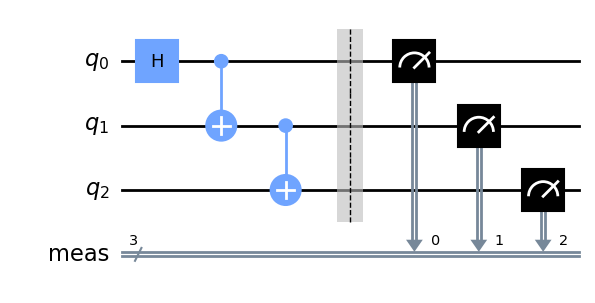

In [5]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cnot(0, 1)
circuit.cnot(1, 2)

circuit.measure_all()
circuit.draw(output='mpl')

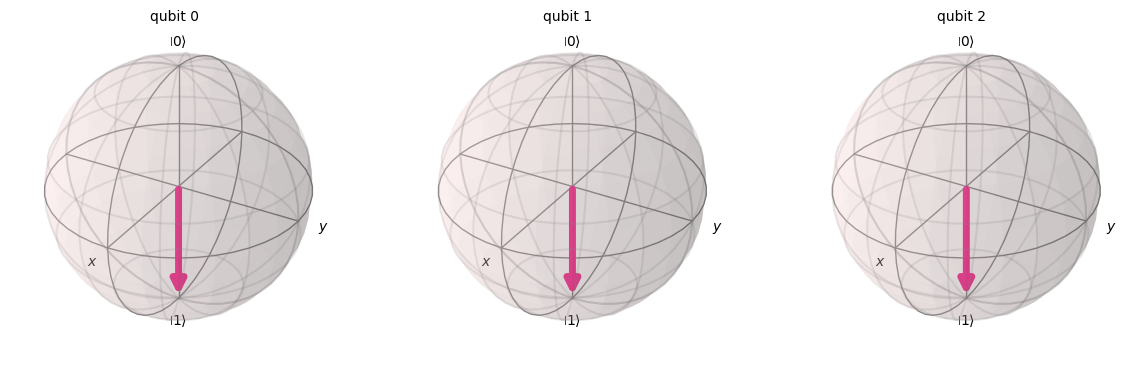

In [6]:
plot_bloch(circuit)

In [7]:
state_vector(circuit)

<IPython.core.display.Latex object>

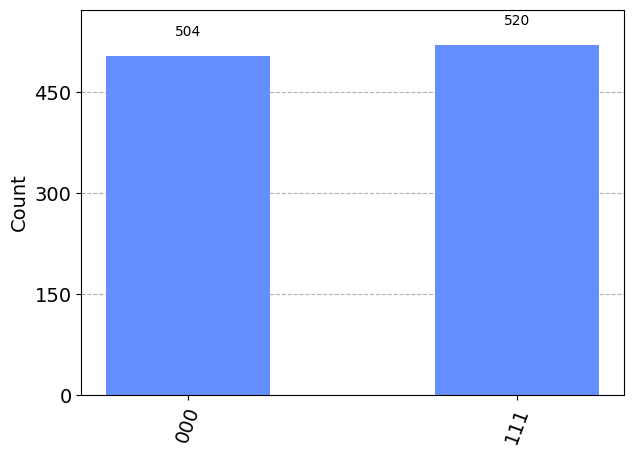

In [8]:
aersim = AerSimulator()
# Perform an ideal simulation
result_ideal = aersim.run(circuit).result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal)

**Excercise 2:** Much complicated entanglement swapping based quantum channel circuit

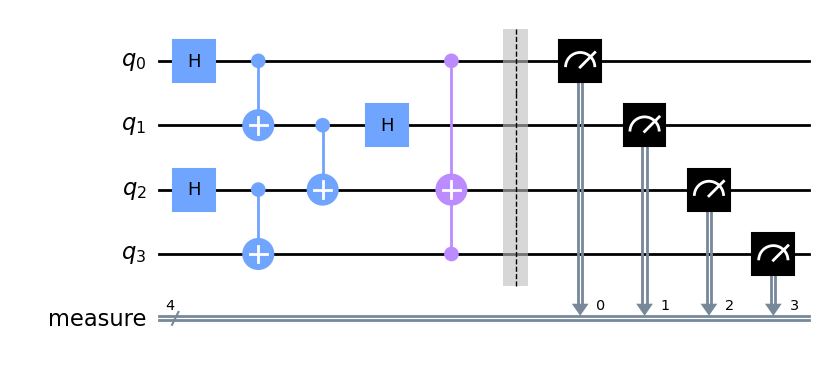

In [19]:
circuit = QuantumCircuit(4)
circuit.h(0)
circuit.cx(0,1)

circuit.h(2)
circuit.cx(2,3)
circuit.cx(1,2)

circuit.h(1)

circuit.ccx(0,3,2)

circuit.measure_active()
circuit.draw(output='mpl')

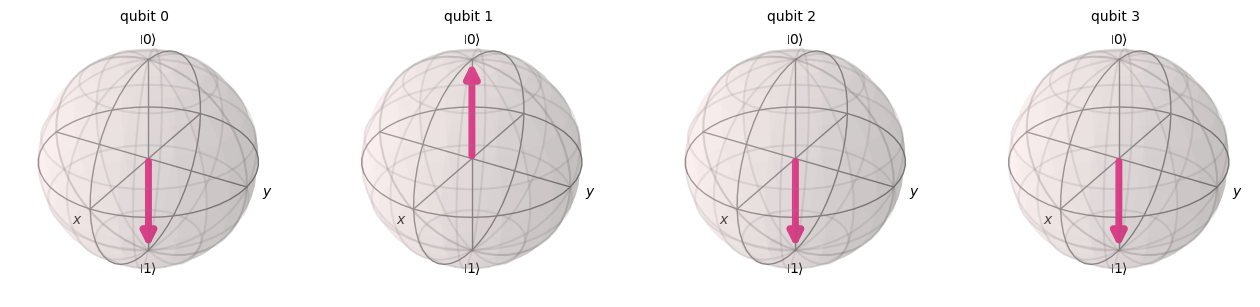

In [20]:
plot_bloch(circuit)

In [21]:
state_vector(circuit)

<IPython.core.display.Latex object>

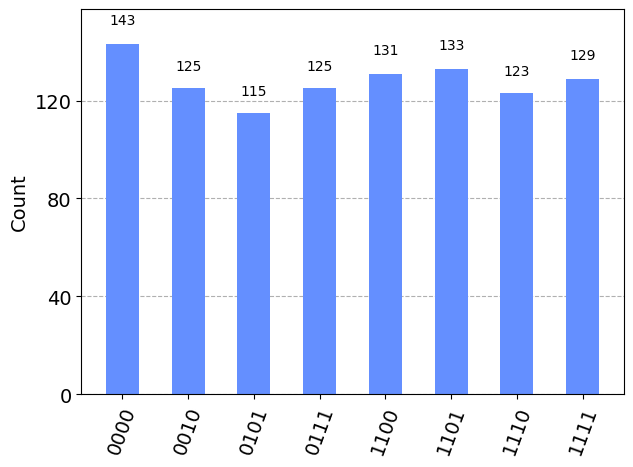

In [22]:
aersim = AerSimulator()
# Perform an ideal simulation
result_ideal = aersim.run(circuit).result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal)